In [2]:
%matplotlib inline
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
dfs = {}
dfs['MNIST CNN'] = pd.DataFrame({'Local epochs (E)': [1, 5, 1, 20, 1, 5, 20, 5, 20], 
                   'Local batch size (B)': ['∞', '∞', 50, '∞', 10, 50, 50, 10, 10],                        'IID': [626, 179, 65, 234, 34, 29, 32, 20, 18],
                    'Non-IID': [483, 1000, 600, 672, 350, 334, 426, 229, 173]})
dfs['Shakespeare LSTM'] = pd.DataFrame({'Local epochs (E)': [1, 1, 5, 1, 5, 5], 
                   'Local batch size (B)': ['∞', 50, '∞', 10, 50, 10],                                      'IID': [2488, 1635, 613, 460, 401, 192],
                   'Non-IID': [3906, 549, 597, 164, 152, 41]})

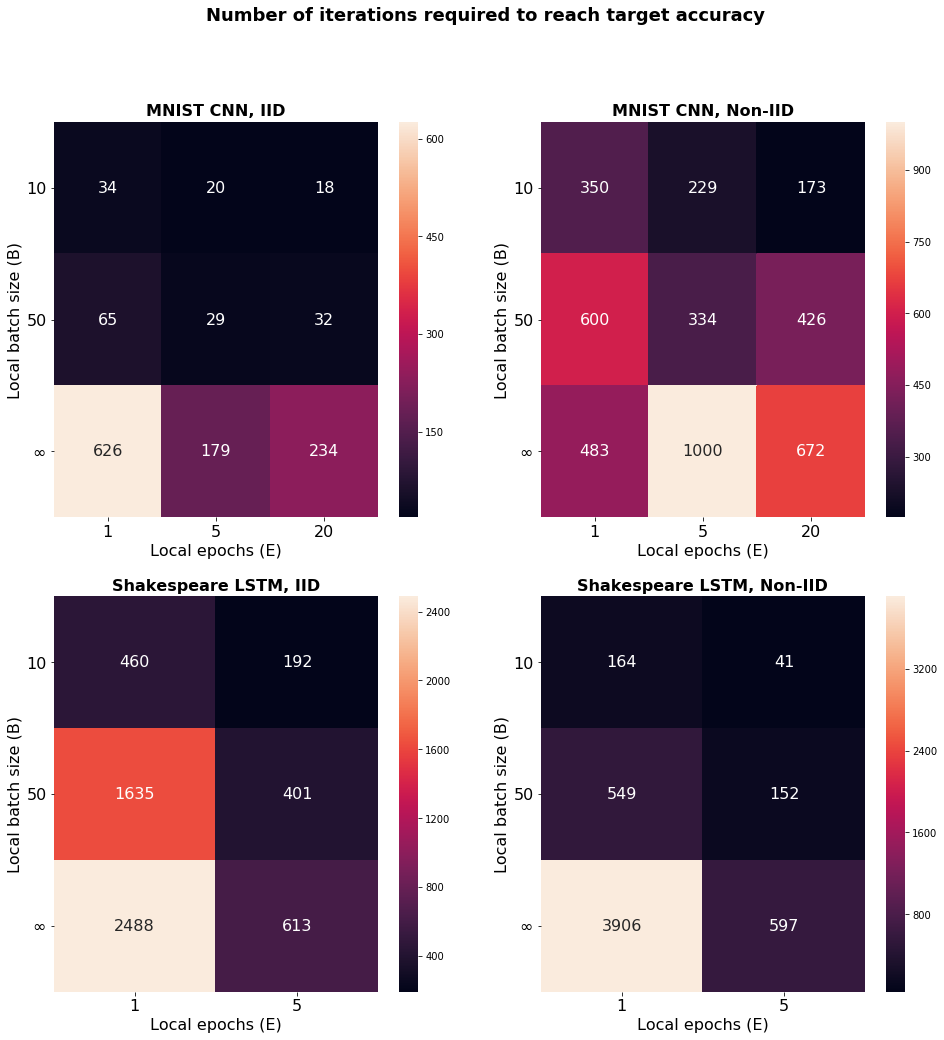

In [65]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(16)
fig.set_figheight(16)

plt.suptitle('Number of iterations required to reach target accuracy', fontsize=18, fontweight='bold');

for i, (name, df) in enumerate(dfs.items()):
    for j, dist in enumerate(['IID', 'Non-IID']):
        ax = axes[i][j]
        ax.set_title('{}, {}'.format(name, dist), fontsize=16, fontweight='bold')
        sns.heatmap(dfs[name].pivot('Local batch size (B)', 'Local epochs (E)', dist), ax=ax,
                   annot=True, fmt='0d', annot_kws={'fontsize':16})
        
        for prop in ['label', 'ticklabels']:
            for dim in ['x','y']:
                attr = '{}{}'.format(dim, prop)
                rotation = 90 if attr == 'ylabel' else 0
                getattr(ax, 'set_{}'.format(attr))(getattr(ax, 'get_{}'.format(attr))(), 
                                                   fontdict={'fontsize':16}, rotation=rotation)


A few observations:
- In every case with a small batchsize of 10 increasing the number of epochs causes number of iterations to go down monotonically .
- In all but one other case (MNIST CNN, Non-IID for batchsize of $\infty$ meaning all the local examples) number of iterations go down after an initial increase to 5 but then go up again when increased to 20. 
- The percentage improvement for Non-IID for Shakespeare LSTM is significantly (almost 100x) higher in the best case than the baseline of batchsize $\infty$ and only one epoch and better than the best IID value (both absolutely and relative to the baseline in each case).
- However the best value is less than 3x better than the baseline for Non-IID MNIST CNN which is significantly worse both absolutely and relative to baseline compared to the IID but because local models are trained on partitions that typically contain a small subset of the 10 digits so it is notable that averaging actually improves convergence. 